In [185]:
'''
Author: Demetric Thompson
Purpose: The purpose of this source code is to automate the API extraction process for cryptocurrency,
and to automate appending data to dataframe
'''

'\nAuthor: Demetric Thompson\nPurpose: The purpose of this source code is to automate the API extraction process for cryptocurrency,\nand to automate appending data to dataframe\n'

In [186]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

In [187]:
#change data rate of jupyter notebook because otherwise the api will not send responce because data rate exceeded
# run this without parenthesee "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10" in anaconda powershell(terminal) to change data rate, 
#and then open file that is under "To access the notebook, open this file in a browser:"


In [188]:
# this is in api docs
# replaced sandbox url with url that is supposed to be used
# replaced sanbox api with api that is given to developers

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f36a2b1e-3273-4001-ba9e-18986a55d5f7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [189]:
print(type(data))

<class 'dict'>


In [190]:
# turn data into dataframe
import pandas as pd
#import for vizualizations later
import seaborn as sns
import matplotlib as mpb

#this allows you to see more columns
pd.set_option('display.max_columns', 150)

#this allows you to see more rows
pd.set_option("display.max_rows", 150)

In [191]:
# Normalization involves adjusting values that exist on different scales into a common scale, 

#lets look at some data columns normalized before pulling json dict data into dataframe

pd.json_normalize(data["status"])


,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-06-21T20:05:52.248Z,0,None,29,1,None,10353


In [192]:
df = (pd.json_normalize(data["data"]))

#create a processing timestamp from when data ran
df["timestamp"] = pd.to_datetime("now")

In [193]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,None,2023-06-21T20:04:00.000Z,30123.13469,33969711019.47166,69.28820,0.28315,7.37760,16.59264,12.14780,9.02599,6.47922,584641094247.16528,49.86750,632585828498.80005,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:06:04.159602
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,None,2023-06-21T20:04:00.000Z,1885.41464,11663340603.25320,79.49830,0.74244,5.50041,9.29967,3.83003,0.66256,3.73810,226627918822.65073,19.33040,226627918822.64999,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:06:04.159602
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,None,2023-06-21T20:04:00.000Z,1.00028,42198985287.43114,69.86430,0.03029,-0.00634,0.05043,0.02192,0.00616,-0.15124,83200334612.75974,7.09790,88608343320.32001,None,2023-06-21T20:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 20:06:04.159602
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,None,2023-06-21T20:04:00.000Z,248.94270,736970520.53599,71.64610,-0.02440,1.87270,1.91413,-19.73074,-24.53973,-24.51389,38798420845.47685,3.30960,38798420845.48000,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:06:04.159602
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,None,2023-06-21T20:04:00.000Z,1.00024,6784501335.93699,65.09680,0.02029,-0.00596,0.02802,0.03404,0.01311,0.07521,28489123595.14437,2.43000,28489123595.14000,None,2023-06-21T20:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 20:06:04.159602
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,None,2023-06-21T20:04:00.000Z,0.49852,1299240670.53268,27.19360,0.09190,1.67420,-0.56065,8.28209,6.11762,12.24549,25972177157.90128,2.21550,49851938086.57000,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:06:04.159602
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,None,2023-06-21T20:04:00.000Z,0.28611,344490536.06286,69.36670,0.60190,6.66729,5.67819,-22.34769,-27.60159,-23.46784,9992327445.49560,0.85230,12874868943.36000,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:06:04.159602
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,None,2023-06-21T20:04:00.000Z,0.06581,369888076.52732,118.10060,0.17281,5.07514,7.08106,-9.80223,-17.86304,-14.59340,9204477047.09393,0.78520,9204477047.09000,None,2023-06-21T20:04:00.000Z,nan,NaN,NaN

In [194]:
#create api function that runs the get request from api

def api_runner():
    #create df as global variable to use outside of function
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f36a2b1e-3273-4001-ba9e-18986a55d5f7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # create new dataframe to append data
    
    #this is one way but i think it pulls in duplicates
#     df2 = (pd.json_normalize(data["data"]))
    
    #create a processing timestamp from when data ran
    # and append new dataframe to old dataframe
#     df2["timestamp"] = pd.to_datetime("now")
#     df = df.append(df2)

    # this is probably a better way to do it
    #create a initial dataframe
    df_0 = pd.json_normalize(data["data"])
    df_0["timestamp"] = pd.to_datetime("now")
    #create empty dataframe with columns from initial dataframe
    column_names = df_0.columns
    df = pd.DataFrame(columns= column_names)
    #create datframe that will be appended to csv only
    df_csv = df_0
    #append to data
    df = df.append(df_0)
    
    #check if file to save api dataframe is created, if not create
    if not os.path.isfile(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv"):
        df_csv.to_csv(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv",header = "column_names")
    #if file to save api dataframe is created, put file in append mode and put header argument as False
    #or it will add a new headers in the middle of data
    else:
        df_csv.to_csv(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv",mode= 'a',header = False)

In [195]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [ ]:
#automating code
import os
from time import time
from time import sleep

#used 333 because that is limit on times api can be run in a day
for i in range(0,333,1):
    api_runner()
    print("api_runner completed correctly")
    #sleep module counts by seconds default
    #make it sleep for one minute
    sleep(60)
exit()


api_runner completed correctly


In [197]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,nan,2023-06-21T20:07:00.000Z,30108.24132,33916548051.83134,68.96430,0.02488,7.78082,18.31801,12.09318,8.87538,6.39334,584352038150.77271,49.84280,632273067743.50000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,nan,2023-06-21T20:07:00.000Z,1883.46265,11634392632.14524,78.34300,0.41229,5.84612,12.34364,3.72751,0.46554,3.50134,226393288418.34857,19.31040,226393288418.35001,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,nan,2023-06-21T20:07:00.000Z,1.00010,42116522674.73569,69.16940,0.00532,-0.01782,0.05588,0.00432,-0.01752,-0.17113,83185000358.25862,7.09660,88592012341.67999,nan,2023-06-21T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 20:08:32.110697
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,nan,2023-06-21T20:07:00.000Z,248.73112,735721295.75986,71.20430,-0.17762,1.97474,2.97666,-19.76661,-24.66203,-24.60171,38765445225.60288,3.30650,38765445225.60000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,nan,2023-06-21T20:07:00.000Z,1.00013,6764220368.34378,64.46820,0.01417,-0.00574,0.04111,0.02303,-0.00161,0.05786,28486064293.71350,2.42970,28486064293.71000,nan,2023-06-21T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 20:08:32.110697
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,nan,2023-06-21T20:07:00.000Z,0.49861,1297859282.12945,27.01900,0.09706,1.85508,1.14428,8.25951,6.13658,12.22590,25976701157.39327,2.21570,49860621615.14000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,nan,2023-06-21T20:07:00.000Z,0.28614,344095895.10718,69.10970,0.56204,6.87196,7.02356,-22.32304,-27.63407,-23.45044,9993266091.27864,0.85240,12876078365.44000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,nan,2023-06-21T20:07:00.000Z,0.06580,369899615.39103,117.43410,0.14551,5.18665,8.56651,-9.81732,-17.89081,-14.61967,9202905094.71887,0.78510,9202905094.72000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-

In [198]:
#change float format from scientific notation to decimal
pd.set_option("display.float_format",lambda x: "%.5f" % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,nan,2023-06-21T20:07:00.000Z,30108.24132,33916548051.83134,68.96430,0.02488,7.78082,18.31801,12.09318,8.87538,6.39334,584352038150.77271,49.84280,632273067743.50000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,nan,2023-06-21T20:07:00.000Z,1883.46265,11634392632.14524,78.34300,0.41229,5.84612,12.34364,3.72751,0.46554,3.50134,226393288418.34857,19.31040,226393288418.35001,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,nan,2023-06-21T20:07:00.000Z,1.00010,42116522674.73569,69.16940,0.00532,-0.01782,0.05588,0.00432,-0.01752,-0.17113,83185000358.25862,7.09660,88592012341.67999,nan,2023-06-21T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 20:08:32.110697
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,nan,2023-06-21T20:07:00.000Z,248.73112,735721295.75986,71.20430,-0.17762,1.97474,2.97666,-19.76661,-24.66203,-24.60171,38765445225.60288,3.30650,38765445225.60000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,nan,2023-06-21T20:07:00.000Z,1.00013,6764220368.34378,64.46820,0.01417,-0.00574,0.04111,0.02303,-0.00161,0.05786,28486064293.71350,2.42970,28486064293.71000,nan,2023-06-21T20:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 20:08:32.110697
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,nan,2023-06-21T20:07:00.000Z,0.49861,1297859282.12945,27.01900,0.09706,1.85508,1.14428,8.25951,6.13658,12.22590,25976701157.39327,2.21570,49860621615.14000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,nan,2023-06-21T20:07:00.000Z,0.28614,344095895.10718,69.10970,0.56204,6.87196,7.02356,-22.32304,-27.63407,-23.45044,9993266091.27864,0.85240,12876078365.44000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:08:32.110697
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,nan,2023-06-21T20:07:00.000Z,0.06580,369899615.39103,117.43410,0.14551,5.18665,8.56651,-9.81732,-17.89081,-14.61967,9202905094.71887,0.78510,9202905094.72000,nan,2023-06-21T20:07:00.000Z,nan,NaN,NaN,NaN,NaN,2023-

In [199]:
#group by name in descending order
df2 = df.groupby("name",sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", \
                              "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", \
                              "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()

In [200]:
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02488,7.78082,18.31801,12.09318,8.87538,6.39334
Ethereum,0.41229,5.84612,12.34364,3.72751,0.46554,3.50134
Tether,0.00532,-0.01782,0.05588,0.00432,-0.01752,-0.17113
BNB,-0.17762,1.97474,2.97666,-19.76661,-24.66203,-24.60171
USD Coin,0.01417,-0.00574,0.04111,0.02303,-0.00161,0.05786
XRP,0.09706,1.85508,1.14428,8.25951,6.13658,12.22590
Cardano,0.56204,6.87196,7.02356,-22.32304,-27.63407,-23.45044
Dogecoin,0.14551,5.18665,8.56651,-9.81732,-17.89081,-14.61967
Solana,0.27561,4.48197,15.85569,-13.07129,-21.52407,-22.48482


In [201]:
#use  stack method to convert dataframe columns to rows
# it will convert dataframe to series
df3 = df2.stack()
print(type(df3))
df3

<class 'pandas.core.series.Series'>


name                                         
Bitcoin          quote.USD.percent_change_1h      0.02488
                 quote.USD.percent_change_24h     7.78082
                 quote.USD.percent_change_7d     18.31801
                 quote.USD.percent_change_30d    12.09318
                 quote.USD.percent_change_60d     8.87538
                 quote.USD.percent_change_90d     6.39334
Ethereum         quote.USD.percent_change_1h      0.41229
                 quote.USD.percent_change_24h     5.84612
                 quote.USD.percent_change_7d     12.34364
                 quote.USD.percent_change_30d     3.72751
                 quote.USD.percent_change_60d     0.46554
                 quote.USD.percent_change_90d     3.50134
Tether           quote.USD.percent_change_1h      0.00532
                 quote.USD.percent_change_24h    -0.01782
                 quote.USD.percent_change_7d      0.05588
                 quote.USD.percent_change_30d     0.00432
                 quote.USD

In [202]:
#convert series back to dataframe
df4 = df3.to_frame(name="values")
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.02488
                quote.USD.percent_change_24h   7.78082
                quote.USD.percent_change_7d   18.31801
                quote.USD.percent_change_30d  12.09318
                quote.USD.percent_change_60d   8.87538
                quote.USD.percent_change_90d   6.39334
Ethereum        quote.USD.percent_change_1h    0.41229
                quote.USD.percent_change_24h   5.84612
                quote.USD.percent_change_7d   12.34364
                quote.USD.percent_change_30d   3.72751
                quote.USD.percent_change_60d   0.46554
                quote.USD.percent_change_90d   3.50134
Tether          quote.USD.percent_change_1h    0.00532
                quote.USD.percent_change_24h  -0.01782
                quote.USD.percent_change_7d    0.05588
                quote.USD.percent_change_30d   0.00432
                quote.USD.percent_change_60d  -0.01752
                quote.USD.percent_change_90d  -0.17113
BNB             quote.USD.percent_change_1h   -0.17762
                quote.USD.percent_change_24h   1.97474
                quote.USD.percent_change_7d    2.97666
                quote.USD.percent_change_30d -19.76661
                quote.USD.percent_change_60d -24.66203
                quote.USD.percent_change_90d -24.60171
USD Coin        quote.USD.percent_change_1h    0.01417
                quote.USD.percent_change_24h  -0.00574
                quote.USD.percent_change_7d    0.04111
                quote.USD.percent_change_30d   0.02303
                quote.USD.percent_change_60d  -0.00161
                quote.USD.percent_change_90d   0.05786
XRP             quote.USD.percent_change_1h    0.09706
                quote.USD.percent_change_24h   1.85508
                quote.USD.percent_change_7d    1.14428
                quote.USD.percent_change_30d   8.25951
                quote.USD.percent_change_60d   6.13658
                quote.USD.percent_change_90d  12.22590
Cardano         quote.USD.percent_change_1h    0.56204
                quote.USD.percent_change_24h   6.87196
                quote.USD.percent_change_7d    7.02356
                quote.USD.percent_change_30d -22.32304
                quote.USD.percent_change_60d -27.63407
                quote.USD.percent_change_90d -23.45044
Dogecoin        quote.USD.percent_change_1h    0.14551
                quote.USD.percent_change_24h   5.18665
                quote.USD.percent_change_7d    8.56651
                quote.USD.percent_change_30d  -9.81732
                quote.USD.percent_change_60d -17.89081
                quote.USD.percent_change_90d -14.61967
Solana          quote.USD.percent_change_1h    0.27561
                quote.USD.percent_change_24h   4.48197
                quote.USD.percent_change_7d   15.85569
                quote.USD.percent_change_30d -13.07129
                quote.USD.percent_change_60d -21.52407
                quote.USD.percent_change_90d -22.48482
TRON            quote.USD.percent_change_1h    0.14017
                quote.USD.percent_change_24h   2.85224
                quote.USD.percent_change_7d    0.51071
                quote.USD.percent_change_30d  -8.28023
                quote.USD.percent_change_60d   9.32124
                quote.USD.percent_change_90d  10.70971
Litecoin        quote.USD.percent_change_1h   -0.11290
                quote.USD.percent_change_24h   6.52693
                quote.USD.percent_change_7d   13.17947
                quote.USD.percent_change_30d  -6.31377
                quote.USD.percent_change_60d  -2.17448
                quote.USD.percent_change_90d  -9.24445
Polygon         quote.USD.percent_change_1h    0.22226
                quote.USD.percent_change_24h   5.78950
                quote.USD.percent_change_7d    3.98146
                quote.USD.percent_change_30d -23.78029
                quote.USD.percent_change_60d -35.14033
                quote.USD.percent

In [203]:
#this is one way to create index for series turned into dataframe
#create an index for this dataframe
#first create list to save index range
index_range = [x for x in range(0,len(df4))]
#then create index using Index method from python
index = pd.Index(index_range)
df5 = df4.set_index(index)
df5



,values
0,0.02488
1,7.78082
2,18.31801
3,12.09318
4,8.87538
5,6.39334
6,0.41229
7,5.84612
8,12.34364
9,3.72751


In [204]:

#this is another way to do the index that is multi-indexed, better for this program
df6 = df4.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02488
1,Bitcoin,quote.USD.percent_change_24h,7.78082
2,Bitcoin,quote.USD.percent_change_7d,18.31801
3,Bitcoin,quote.USD.percent_change_30d,12.09318
4,Bitcoin,quote.USD.percent_change_60d,8.87538
5,Bitcoin,quote.USD.percent_change_90d,6.39334
6,Ethereum,quote.USD.percent_change_1h,0.41229
7,Ethereum,quote.USD.percent_change_24h,5.84612
8,Ethereum,quote.USD.percent_change_7d,12.34364
9,Ethereum,quote.USD.percent_change_30d,3.72751


In [205]:
#rename column to percent change
df7 = df6.rename(columns = {"level_1" : "percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02488
1,Bitcoin,quote.USD.percent_change_24h,7.78082
2,Bitcoin,quote.USD.percent_change_7d,18.31801
3,Bitcoin,quote.USD.percent_change_30d,12.09318
4,Bitcoin,quote.USD.percent_change_60d,8.87538
5,Bitcoin,quote.USD.percent_change_90d,6.39334
6,Ethereum,quote.USD.percent_change_1h,0.41229
7,Ethereum,quote.USD.percent_change_24h,5.84612
8,Ethereum,quote.USD.percent_change_7d,12.34364
9,Ethereum,quote.USD.percent_change_30d,3.72751


In [206]:
#change values to better format
df7["percent_change"] = df7['percent_change'].replace(["quote.USD.percent_change_1h",\
                               'quote.USD.percent_change_24h','quote.USD.percent_change_7d',\
                               'quote.USD.percent_change_30d',"quote.USD.percent_change_60d",\
                               "quote.USD.percent_change_90d"],
                             ["1h","24h","7d","30d","60d","90d"])

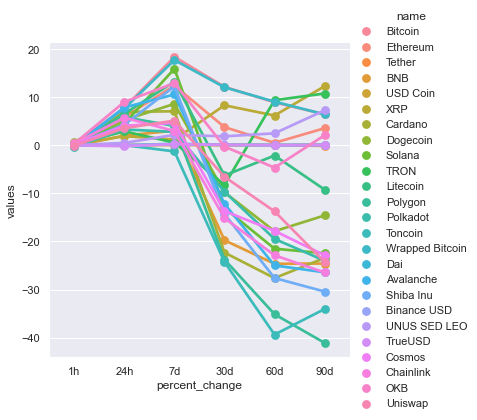

In [207]:
sns.catplot(x="percent_change", y="values",hue = "name", data = df7, kind = "point")

In [208]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.02488
1,Bitcoin,24h,7.78082
2,Bitcoin,7d,18.31801
3,Bitcoin,30d,12.09318
4,Bitcoin,60d,8.87538
5,Bitcoin,90d,6.39334
6,Ethereum,1h,0.41229
7,Ethereum,24h,5.84612
8,Ethereum,7d,12.34364
9,Ethereum,30d,3.72751


In [209]:
#now let's look at a crypto currency's value at the time it was ran by interpreter
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Ethereum'")
df8

,name,quote.USD.price,timestamp
1,Ethereum,1883.46265,2023-06-21 20:08:32.110697


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

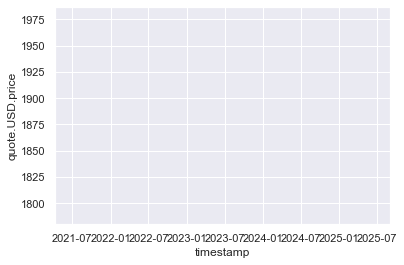

In [210]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)
